## 数据可视化

In [1]:
import data

num_char = data.df_label
num_char["length"] = num_char['label'].apply(len)

def count_char(label):
    count_lists = [label.count(char) for char in data.characters]
    return count_lists

for i, char in enumerate(data.characters):
    num_char[char] = [num[i] for num in num_char.label.apply(count_char)]

num_char.head()

,label,length,0,1,2,3,4,5,6,7,8,9,+,-,*,=,(,)
filename,,,,,,,,,,,,,,,,,,
train/0.jpg,(0+0)+9=9,9,2,0,0,0,0,0,0,0,0,2,2,0,0,1,1,1
train/1.jpg,9*8+6=78,8,0,0,0,0,0,0,1,1,2,1,1,0,1,1,0,0
train/2.jpg,1+7+0=8,7,1,1,0,0,0,0,0,1,1,0,2,0,0,1,0,0
train/3.jpg,5+4+9=18,8,0,1,0,0,1,1,0,0,1,1,2,0,0,1,0,0
train/4.jpg,7-(1*7)=0,9,1,1,0,0,0,0,0,2,0,0,0,1,1,1,1,1


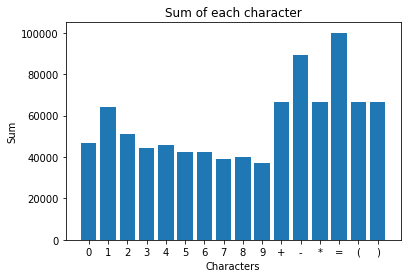

In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

fig,ax = plt.subplots()

ax.bar(range(1,len(data.characters)+1),num_char.loc[:,list(data.characters)].sum(axis=0))
ticks = ax.set_xticks(range(1,len(data.characters)+1))
labels = ax.set_xticklabels(data.characters)
xlabel = ax.set_xlabel('Characters')
ylabel = ax.set_ylabel('Sum')
title = ax.set_title('Sum of each character')

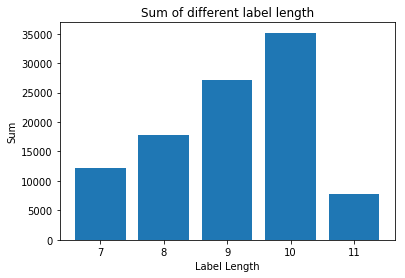

In [3]:
plt.bar(num_char["length"].value_counts().index.tolist(), num_char["length"].value_counts())
plt.xlabel('Label Length') 
plt.ylabel('Sum')
title = plt.title('Sum of different label length')

## 随机验证码模型构建

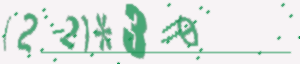

In [4]:
from captcha.image import ImageCaptcha
from PIL import Image
import os
import string

characters = string.digits + '+-*=()'
width, height, n_len, n_class = 300, 64, 15, len(characters)+1
generator = ImageCaptcha(width=width, height=height, font_sizes=range(35, 56), 
                         fonts=['fonts/%s'%x for x in os.listdir('fonts') if '.tt' in x])
generator.generate_image('(2-2)*3=0')


# https://cloud.tencent.com/developer/article/1062013